In [10]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Потренируемся на каком-то самом простом примере, чтобы понять логику

In [2]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


Сначала нужно создать классификатор

In [3]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [4]:
X = data[['X_1', 'X_2']]
y = data.Y

    **Обучаем дерево решений**

In [5]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Визуализация дерева решений

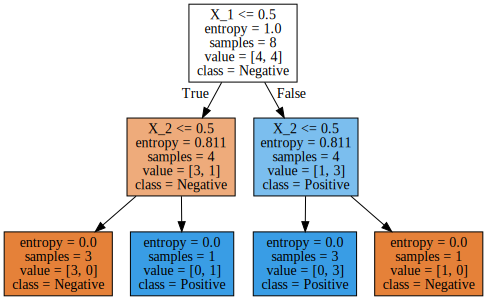

In [7]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Negative','Positive'],
                                   filled = True))

display(SVG(graph.pipe(format='svg')))

- **ЭНТРОПИЯ - УРОВЕНЬ НЕОПРЕДЕЛЕННОСТИ В ДАННЫХ.** Очень часто этот термин используют, при обсуждении темы решающих деревьев. Максимальный уровень энтропии = 1, когда уровень неопределенности равен случайному угадыванию.
- **IG - INFORMATION GAIN** какой выиграш мы получили, использую сплит по определенной фиче.

***ОПИСАНИЕ КОНЦЕПЦИИ ДЕРЕВА РЕШЕНИЙ*** Т.е. каким образом работает дерево решений: есть одна зависимая переменная и набор фичей, дерево решений на первом шаге перебирает все возможные сплиты по всем фичам и по всем его значениям (если переменная непрерывная - будет перебирать каждое значение) и выберет для первого сплита тот сплит, где INFORMATION GAIN был наибольший (т.е. где наибольше снизился уровень энтропии). И так далее дерево решений на каждом этапе будет перебирать все значения и брать те, где будет получаться максимальный INFORMATION GAIN. И так будет делать, пока все не поделит.

In [22]:
np.log2(5/6)

-0.2630344058337938

In [23]:
(5/6)*0.2630

0.21916666666666668